In [113]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

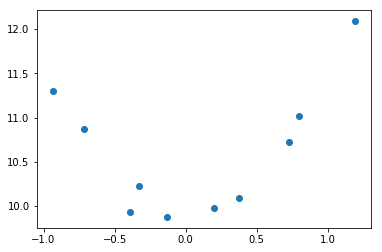

In [216]:
# データを作る
def f(x):
    return 1.5*x*x + 10

x_data = np.linspace( -1, 1, 10 ) + np.random.normal(0, 0.3,  10 )
y_data = f( x_data ) + np.random.normal(0, 0.1,  x_data.shape )

plt.scatter( x_data, y_data )

In [229]:
# モデルを定義
dim = 9

## 入力：1次元で個数は未知（None）
X = tf.placeholder(tf.float32, shape=(None,1))

## [x, x^2, x^3, x^4, x^5]となる行列を作る
XX = tf.concat( [X**d for d in range(1,dim+1)], 1 )

## モデルパラメータ
w = tf.Variable(tf.zeros([dim,1]))
b = tf.Variable( tf.zeros(1) )

# 多項式
y = tf.matmul(XX, w) + b

# 正解データ
y_ = tf.placeholder(tf.float32, shape=(None,1))

In [236]:
# 目的関数
loss = tf.reduce_mean(tf.square(y - y_))

# 正則化
#loss += 0.1*tf.reduce_sum( tf.abs(w) )

# 勾配降下法
train_step = tf.train.AdamOptimizer(0.1).minimize(loss)

In [ ]:
# 学習
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    for itr in range(1000):
        feed_dict = {X: x_data.reshape(-1,1), y_:y_data.reshape(-1,1)}
        _, train_loss = sess.run([train_step, loss], feed_dict=feed_dict)
        
        print( "itr: " , itr,  "loss: ", train_loss)

    # 学習した関数を表示
    x_pred = np.linspace( -1, 1, 100 )
    feed_dict = {X: x_pred.reshape( -1, 1 )}

    y_pred, weight, bias = sess.run([y, w, b], feed_dict=feed_dict)

    print("weight")
    print(weight)
    print("bias")
    print(bias)
    
    plt.plot(x_pred, y_pred.reshape(-1))
    plt.scatter(x_data, y_data)

    plt.show()
